In [ ]:
from google.colab import drive #This should connect to your google drive, we may need to reconfigure
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd #Maybe replace with Numpy
df = pd.read_csv('/content/drive/MyDrive/Adv Python Knicks Project/Code + Data/Data/Knicks 313 Stats.csv') #May need to change based on owner access

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Adv Python Knicks Project/Code + Data/Data/Knicks 313 Stats.csv'

Data loaded. Shape: (68, 51)
  Rk Gtm      Date  H/@  Opp score Rslt  score Tm  score Opp score OT  \
0  1   1  10/22/24    @  BOS          L     109.0      132.0      NaN   
1  2   2  10/25/24  NaN  IND          W     123.0       98.0      NaN   
2  3   3  10/28/24  NaN  CLE          L     104.0      110.0      NaN   
3  4   4  10/30/24    @  MIA          W     116.0      107.0      NaN   
4  5   5   11/1/24    @  DET          W     128.0       98.0      NaN   

   Team FG  ...  Opponent FTA  Opponent FT%  Opponent ORB  Opponent DRB  \
0     43.0  ...           8.0         0.875          11.0          29.0   
1     44.0  ...          20.0         0.650           9.0          24.0   
2     40.0  ...          24.0         0.833           9.0          32.0   
3     40.0  ...          24.0         0.667           7.0          32.0   
4     52.0  ...           7.0         0.714           6.0          32.0   

   Opponent TRB  Opponent AST  Opponent STL  Opponent BLK  Opponent TOV  \
0     

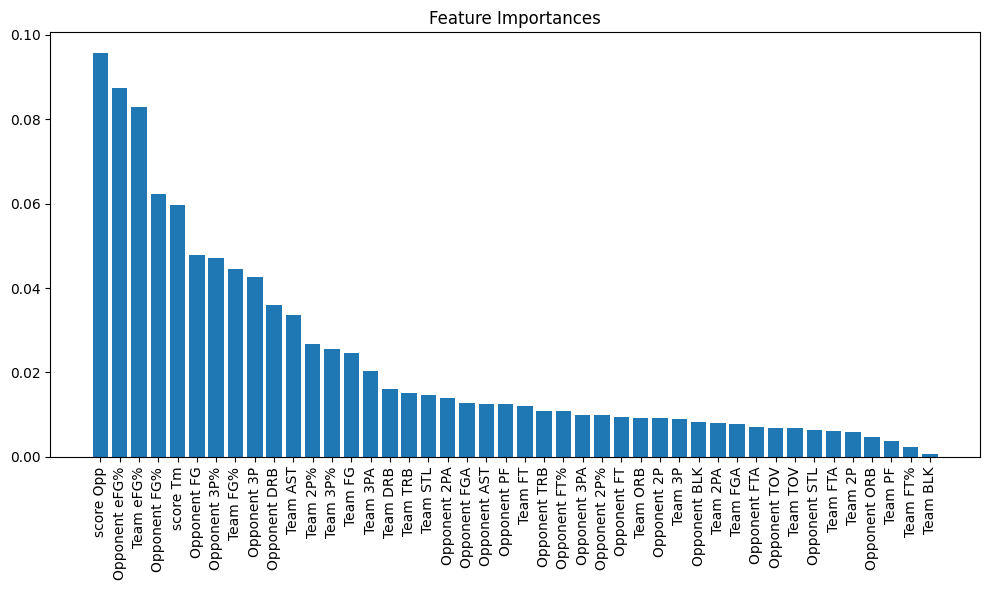

In [ ]:
#!/usr/bin/env python3
"""
Random Forest Model for Knicks Game Data with Imputation and Updated Target

This script loads the Knicks game stats from 'Knicks 313 Stats.csv', converts the outcome
stored in 'score Rslt' to binary (1 for win, 0 for loss), drops rows with missing target values,
imputes missing data for numeric features, and fits a RandomForestClassifier to predict game outcomes.
It also plots the feature importances.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# ---------------------------
# Data Loading & Preprocessing
# ---------------------------
data = pd.read_csv("Knicks 313 Stats.csv")
print("Data loaded. Shape:", data.shape)
print(data.head())

# Replace target column 'score Rslt' with binary values: 'W' -> 1, 'L' -> 0
data['score Rslt'] = data['score Rslt'].map({'W': 1, 'L': 0})

# Drop rows where the target (score Rslt) is missing
data = data[data['score Rslt'].notna()]
print("After dropping rows with missing target, shape:", data.shape)

# For columns like 'score OT', assume missing means no overtime occurred and fill with 0.
if 'score OT' in data.columns:
    data['score OT'] = data['score OT'].fillna(0)

# Identify numeric columns (excluding the target)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'score Rslt' in numeric_cols:
    numeric_cols.remove('score Rslt')

# Impute missing values in numeric columns using the mean strategy
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

print("After imputation, shape:", data.shape)
print(data.head())

# ---------------------------
# Feature Selection
# ---------------------------
# Use all numeric columns except the target 'score Rslt' as features.
features = data.select_dtypes(include=[np.number]).columns.tolist()
features.remove('score Rslt')
X = data[features]
y = data['score Rslt']
print("Using features:", features)

# ---------------------------
# Train/Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# Random Forest Model Training
# ---------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ---------------------------
# Model Evaluation
# ---------------------------
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ---------------------------
# Feature Importance Plot
# ---------------------------
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
#!/usr/bin/env python3
"""
Random Forest Model for Knicks Game Data with Imputation and Updated Target

This script loads the Knicks game stats from 'Knicks 313 Stats.csv', converts the outcome
stored in 'score Rslt' to binary (1 for win, 0 for loss), drops rows with missing target values,
imputes missing data for numeric features, and fits a RandomForestClassifier to predict game outcomes.
It also plots the feature importances.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# ---------------------------
# Data Loading & Preprocessing
# ---------------------------
data = pd.read_csv("Knicks 313 Stats.csv")
print("Data loaded. Shape:", data.shape)
print(data.head())

# Replace target column 'score Rslt' with binary values: 'W' -> 1, 'L' -> 0
data['score Rslt'] = data['score Rslt'].map({'W': 1, 'L': 0})

# Drop rows where the target (score Rslt) is missing
data = data[data['score Rslt'].notna()]
print("After dropping rows with missing target, shape:", data.shape)

# For columns like 'score OT', assume missing means no overtime occurred and fill with 0.
if 'score OT' in data.columns:
    data['score OT'] = data['score OT'].fillna(0)

# Identify numeric columns (excluding the target)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'score Rslt' in numeric_cols:
    numeric_cols.remove('score Rslt')

# Impute missing values in numeric columns using the mean strategy
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

print("After imputation, shape:", data.shape)
print(data.head())

# ---------------------------
# Feature Selection
# ---------------------------
# Use all numeric columns except the target 'score Rslt' as features.
features = data.select_dtypes(include=[np.number]).columns.tolist()
features.remove('score Rslt')
X = data[features]
y = data['score Rslt']
print("Using features:", features)

# ---------------------------
# Train/Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# Random Forest Model Training
# ---------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ---------------------------
# Model Evaluation
# ---------------------------
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ---------------------------
# Feature Importance Plot
# ---------------------------
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


Data loaded. Shape: (68, 51)
  Rk Gtm      Date  H/@  Opp score Rslt  score Tm  score Opp score OT  \
0  1   1  10/22/24    @  BOS          L     109.0      132.0      NaN   
1  2   2  10/25/24  NaN  IND          W     123.0       98.0      NaN   
2  3   3  10/28/24  NaN  CLE          L     104.0      110.0      NaN   
3  4   4  10/30/24    @  MIA          W     116.0      107.0      NaN   
4  5   5   11/1/24    @  DET          W     128.0       98.0      NaN   

   Team FG  ...  Opponent FTA  Opponent FT%  Opponent ORB  Opponent DRB  \
0     43.0  ...           8.0         0.875          11.0          29.0   
1     44.0  ...          20.0         0.650           9.0          24.0   
2     40.0  ...          24.0         0.833           9.0          32.0   
3     40.0  ...          24.0         0.667           7.0          32.0   
4     52.0  ...           7.0         0.714           6.0          32.0   

   Opponent TRB  Opponent AST  Opponent STL  Opponent BLK  Opponent TOV  \
0     

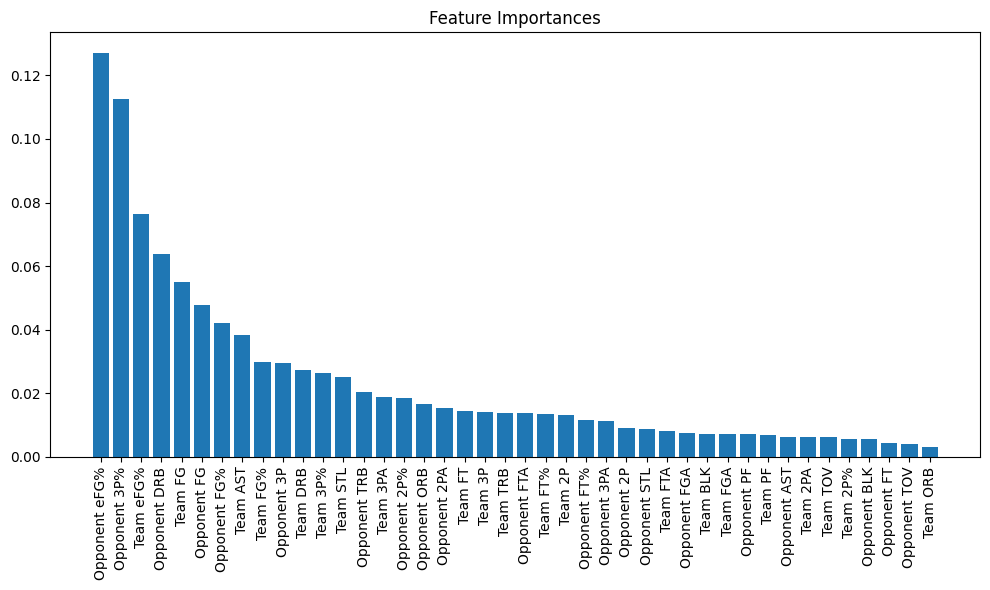

In [ ]:
#!/usr/bin/env python3
"""
Random Forest Model for Knicks Game Data with Imputation and Updated Target

This script loads the Knicks game stats from 'Knicks 313 Stats.csv', converts the outcome
stored in 'score Rslt' to binary (1 for win, 0 for loss), drops rows with missing target values,
imputes missing data for numeric features, and fits a RandomForestClassifier to predict game outcomes.
It also plots the feature importances.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# ---------------------------
# Data Loading & Preprocessing
# ---------------------------
data = pd.read_csv("Knicks 313 Stats.csv")
print("Data loaded. Shape:", data.shape)
print(data.head())

# Replace target column 'score Rslt' with binary values: 'W' -> 1, 'L' -> 0
data['score Rslt'] = data['score Rslt'].map({'W': 1, 'L': 0})

# Drop rows where the target (score Rslt) is missing
data = data[data['score Rslt'].notna()]
print("After dropping rows with missing target, shape:", data.shape)

# For columns like 'score OT', assume missing means no overtime occurred and fill with 0.
if 'score OT' in data.columns:
    data['score OT'] = data['score OT'].fillna(0)

# Identify numeric columns (excluding the target)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'score Rslt' in numeric_cols:
    numeric_cols.remove('score Rslt')

# Impute missing values in numeric columns using the mean strategy
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

print("After imputation, shape:", data.shape)
print(data.head())

# ---------------------------
# Feature Selection
# ---------------------------
# Use all numeric columns except the target 'score Rslt' as features.
features = data.select_dtypes(include=[np.number]).columns.tolist()
features.remove('score Rslt')
features.remove('score Opp')  # Drop 'score Opp'
features.remove('score Tm')
X = data[features]
y = data['score Rslt']
print("Using features:", features)

# ---------------------------
# Train/Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1973
)

# ---------------------------
# Random Forest Model Training
# ---------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ---------------------------
# Model Evaluation
# ---------------------------
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ---------------------------
# Feature Importance Plot
# ---------------------------
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


Data loaded. Shape: (68, 51)
  Rk Gtm      Date  H/@  Opp score Rslt  score Tm  score Opp score OT  \
0  1   1  10/22/24    @  BOS          L     109.0      132.0      NaN   
1  2   2  10/25/24  NaN  IND          W     123.0       98.0      NaN   
2  3   3  10/28/24  NaN  CLE          L     104.0      110.0      NaN   
3  4   4  10/30/24    @  MIA          W     116.0      107.0      NaN   
4  5   5   11/1/24    @  DET          W     128.0       98.0      NaN   

   Team FG  ...  Opponent FTA  Opponent FT%  Opponent ORB  Opponent DRB  \
0     43.0  ...           8.0         0.875          11.0          29.0   
1     44.0  ...          20.0         0.650           9.0          24.0   
2     40.0  ...          24.0         0.833           9.0          32.0   
3     40.0  ...          24.0         0.667           7.0          32.0   
4     52.0  ...           7.0         0.714           6.0          32.0   

   Opponent TRB  Opponent AST  Opponent STL  Opponent BLK  Opponent TOV  \
0     

<ipython-input-1-32f6ae40b4fb>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['score OT'] = data['score OT'].fillna(0)
<ipython-input-1-32f6ae40b4fb>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_cols] = imputer.fit_transform(data[numeric_cols])


Test Accuracy: 92.31%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       0.90      1.00      0.95         9

    accuracy                           0.92        13
   macro avg       0.95      0.88      0.90        13
weighted avg       0.93      0.92      0.92        13



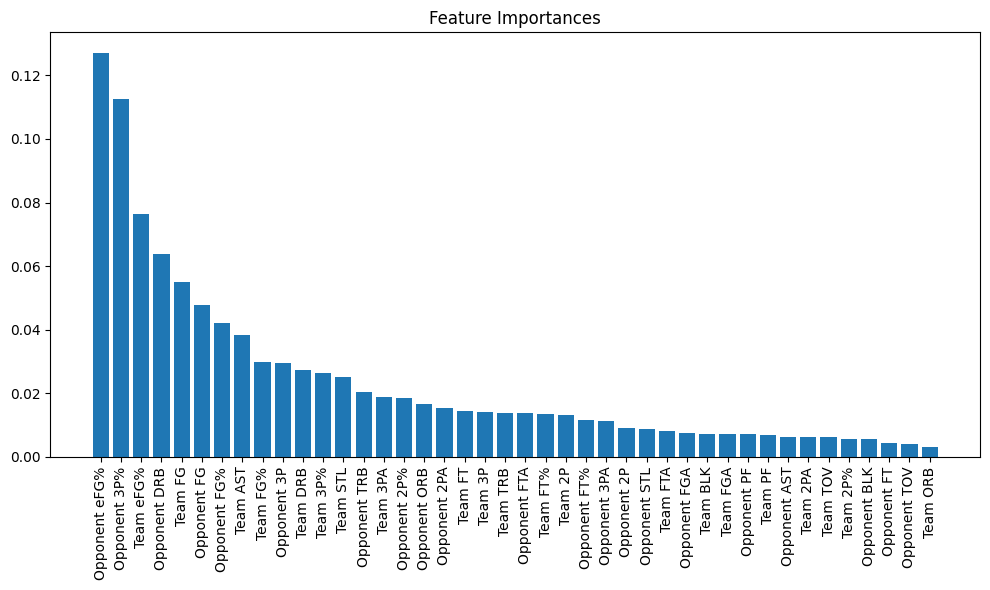

Training time: 2.85 seconds


In [1]:
# prompt: time the previous training run

import time

start_time = time.time()

# Your existing code (the entire script provided) goes here.
#!/usr/bin/env python3
"""
Random Forest Model for Knicks Game Data with Imputation and Updated Target

This script loads the Knicks game stats from 'Knicks 313 Stats.csv', converts the outcome
stored in 'score Rslt' to binary (1 for win, 0 for loss), drops rows with missing target values,
imputes missing data for numeric features, and fits a RandomForestClassifier to predict game outcomes.
It also plots the feature importances.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# ---------------------------
# Data Loading & Preprocessing
# ---------------------------
data = pd.read_csv("Knicks 313 Stats.csv")
print("Data loaded. Shape:", data.shape)
print(data.head())

# Replace target column 'score Rslt' with binary values: 'W' -> 1, 'L' -> 0
data['score Rslt'] = data['score Rslt'].map({'W': 1, 'L': 0})

# Drop rows where the target (score Rslt) is missing
data = data[data['score Rslt'].notna()]
print("After dropping rows with missing target, shape:", data.shape)

# For columns like 'score OT', assume missing means no overtime occurred and fill with 0.
if 'score OT' in data.columns:
    data['score OT'] = data['score OT'].fillna(0)

# Identify numeric columns (excluding the target)
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
if 'score Rslt' in numeric_cols:
    numeric_cols.remove('score Rslt')

# Impute missing values in numeric columns using the mean strategy
imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

print("After imputation, shape:", data.shape)
print(data.head())

# ---------------------------
# Feature Selection
# ---------------------------
# Use all numeric columns except the target 'score Rslt' as features.
features = data.select_dtypes(include=[np.number]).columns.tolist()
features.remove('score Rslt')
features.remove('score Opp')  # Drop 'score Opp'
features.remove('score Tm')
X = data[features]
y = data['score Rslt']
print("Using features:", features)

# ---------------------------
# Train/Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1973
)

# ---------------------------
# Random Forest Model Training
# ---------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ---------------------------
# Model Evaluation
# ---------------------------
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ---------------------------
# Feature Importance Plot
# ---------------------------
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


end_time = time.time()
elapsed_time = end_time - start_time
print(f"Training time: {elapsed_time:.2f} seconds")


In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

def RandForestModel(Boxscore, n_runs=5):
    """
    Trains a RandomForestClassifier on the provided Boxscore DataFrame.
    It preprocesses the data, runs training n_runs times to average the training time,
    prints evaluation metrics and a feature importance plot, and returns the trained model.

    Parameters:
        Boxscore (pd.DataFrame): Input DataFrame with game stats.
        n_runs (int): Number of times to run the training to compute the average time.

    Returns:
        model: The trained RandomForestClassifier.
    """
    data = Boxscore.copy()

    # Map the target 'score Rslt' from characters to binary
    data['score Rslt'] = data['score Rslt'].map({'W': 1, 'L': 0})

    # Drop rows with missing target values
    data = data[data['score Rslt'].notna()]

    # For 'score OT', fill missing values with 0 (assume no overtime)
    if 'score OT' in data.columns:
        data['score OT'] = data['score OT'].fillna(0)

    # Identify numeric columns (except the target)
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    if 'score Rslt' in numeric_cols:
        numeric_cols.remove('score Rslt')

    # Impute missing numeric data using the mean strategy
    imputer = SimpleImputer(strategy='mean')
    data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

    # Define features: all numeric columns except target and unwanted columns
    features = data.select_dtypes(include=[np.number]).columns.tolist()
    features.remove('score Rslt')
    # Drop columns that should not be used as features
    features.remove('score Opp')
    features.remove('score Tm')

    X = data[features]
    y = data['score Rslt']

    times = []
    # Train model n_runs times to compute average training time
    for i in range(n_runs):
        start = time.time()
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=1973
        )
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        end = time.time()
        times.append(end - start)

    avg_time = sum(times) / n_runs

    # Evaluate the model using the last split
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Using features:", features)
    print("Test Accuracy: {:.2f}%".format(accuracy * 100))
    print("Classification Report:")
    print(report)
    print(f"Average Training Time over {n_runs} runs: {avg_time:.2f} seconds")

    # Plot feature importances
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(features)), importances[indices], align="center")
    plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

    return rf

def RandForestPreds(Boxscore, model=None):
    """
    Preprocesses the provided Boxscore DataFrame and returns predictions.
    If no pre-trained model is provided, it will call RandForestModel to train one.

    Parameters:
        Boxscore (pd.DataFrame): Input DataFrame for which predictions are desired.
        model: A pre-trained RandomForestClassifier. If None, one is trained on Boxscore.

    Returns:
        predictions: Model predictions for the processed features.
    """
    data = Boxscore.copy()

    # If the target exists, map it (this won't affect prediction if target is not provided)
    if 'score Rslt' in data.columns:
        data['score Rslt'] = data['score Rslt'].map({'W': 1, 'L': 0})

    # For 'score OT', fill missing values with 0
    if 'score OT' in data.columns:
        data['score OT'] = data['score OT'].fillna(0)

    # Identify numeric columns and impute missing values
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    if 'score Rslt' in numeric_cols:
        numeric_cols.remove('score Rslt')

    imputer = SimpleImputer(strategy='mean')
    data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

    # Define features as in training (assumes same structure as training data)
    features = data.select_dtypes(include=[np.number]).columns.tolist()
    if 'score Rslt' in features:
        features.remove('score Rslt')
    features.remove('score Opp')
    features.remove('score Tm')

    X_new = data[features]

    # If no model is provided, train one using the Boxscore data
    if model is None:
        model = RandForestModel(Boxscore)

    predictions = model.predict(X_new)
    return predictions


Using features: ['Team FG', 'Team FGA', 'Team FG%', 'Team 3P', 'Team 3PA', 'Team 3P%', 'Team 2P', 'Team 2PA', 'Team 2P%', 'Team eFG%', 'Team FT', 'Team FTA', 'Team FT%', 'Team ORB', 'Team DRB', 'Team TRB', 'Team AST', 'Team STL', 'Team BLK', 'Team TOV', 'Team PF', 'Opponent FG', 'Opponent FGA', 'Opponent FG%', 'Opponent 3P', 'Opponent 3PA', 'Opponent 3P%', 'Opponent 2P', 'Opponent 2PA', 'Opponent 2P%', 'Opponent eFG%', 'Opponent FT', 'Opponent FTA', 'Opponent FT%', 'Opponent ORB', 'Opponent DRB', 'Opponent TRB', 'Opponent AST', 'Opponent STL', 'Opponent BLK', 'Opponent TOV', 'Opponent PF']
Test Accuracy: 92.31%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       0.90      1.00      0.95         9

    accuracy                           0.92        13
   macro avg       0.95      0.88      0.90        13
weighted avg       0.93      0.92      0.92        13

Average Training Time over 5 ru

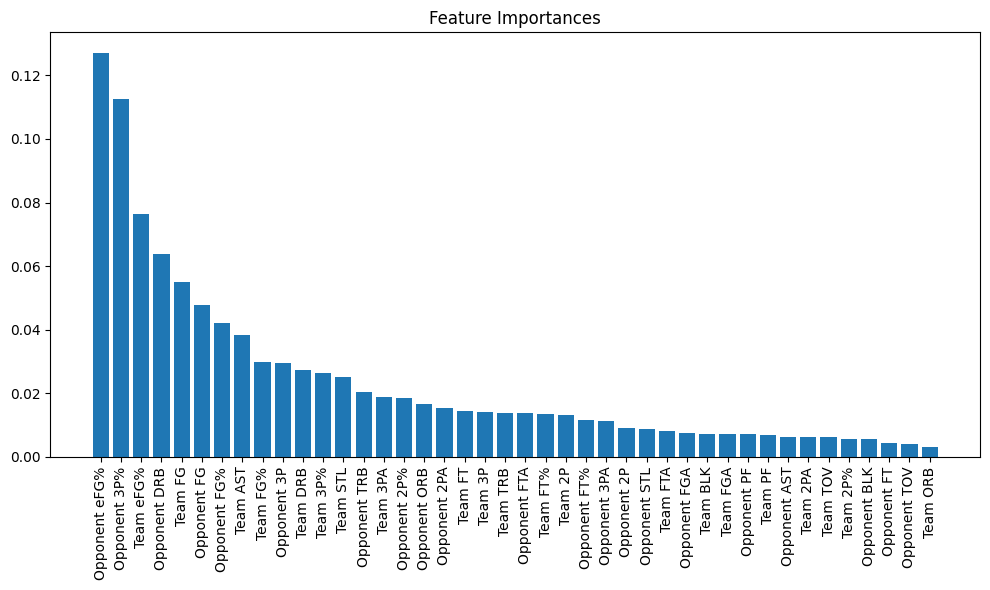

[0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.]


In [3]:
import pandas as pd

# Load your dataset
boxscore_df = pd.read_csv("Knicks 313 Stats.csv")

# Train the model and get evaluation output
model = RandForestModel(boxscore_df, n_runs=5)

# Get predictions (can be on the same data or on new data with the same structure)
preds = RandForestPreds(boxscore_df, model=model)
print(preds)
